In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy.stats as st

In [48]:
data = pd.read_csv('titanic-passengers.csv', header='infer', sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [50]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

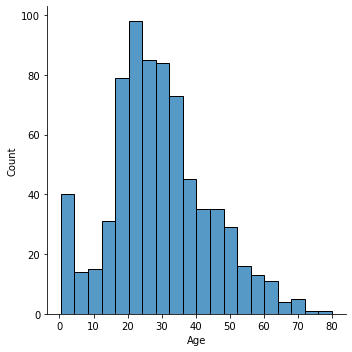

In [51]:
sns.displot(data["Age"])

In [52]:
data["Age"].skew()

0.3891077823008269

In [ ]:
#The Age variable is skewed to the right, so we will fill its nan values with the median rather than the mean

In [53]:
data["Age"].fillna(data["Age"].median(), inplace=True)

In [54]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
B86            1
C104           1
C50            1
B69            1
E50            1
Name: Cabin, Length: 147, dtype: int64

In [55]:
data["Cabin"].fillna("G6", inplace=True) #We've filled with the mode of Cabin
print("The percentage of the missing values in is : ",687/data['Cabin'].value_counts().sum()*100,"%")

The percentage of the missing values in is :  77.10437710437711 %


In [ ]:
#We can ignore this variable in our model since 77% is too large

In [56]:
#preparing data for logistic regression
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   #convert survived variable into numerical
data["Sex"]=data["Sex"].map({"male": 1, "female": 0})   #convert sex variable into numerical
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


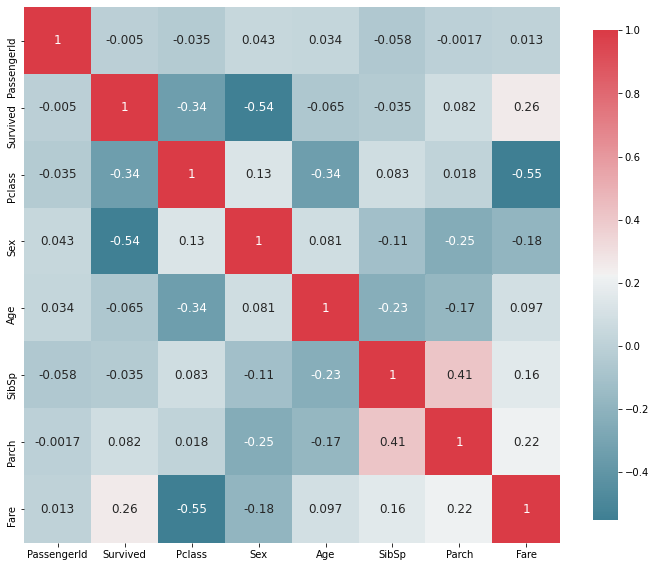

In [69]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( data )

In [79]:
features = data.iloc[:,2:].columns.tolist()
target = data.iloc[:,1].name

In [81]:
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = st.spearmanr(x1,x2)[0]

In [82]:
# Printing all the correlated features value with respect to price which is target variable
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
Sex vs Survived,-0.543351
Pclass vs Survived,-0.339668
Fare vs Survived,0.323736
Cabin vs Survived,-0.312869
Ticket vs Survived,-0.163354
Parch vs Survived,0.138266
SibSp vs Survived,0.088879
Name vs Survived,-0.057343
Age vs Survived,-0.037004
Embarked vs Survived,NaN


In [83]:
#Features extraction
x = data[['Fare', 'Parch','SibSp','Sex']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

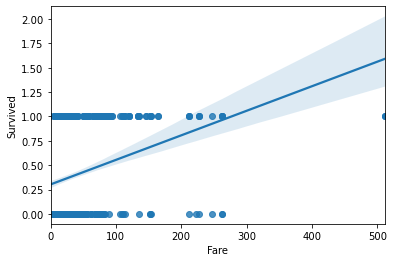

In [87]:
sns.regplot(x='Fare',y='Survived',data=data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

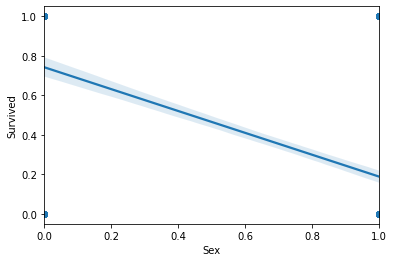

In [88]:
sns.regplot(x='Sex',y='Survived',data=data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

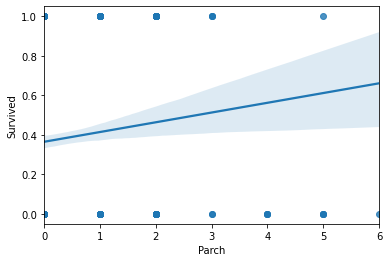

In [89]:
sns.regplot(x='Parch',y='Survived',data=data)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

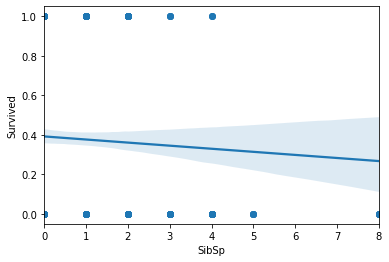

In [92]:
sns.regplot(x='SibSp',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

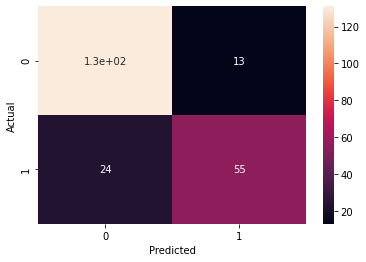

In [94]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

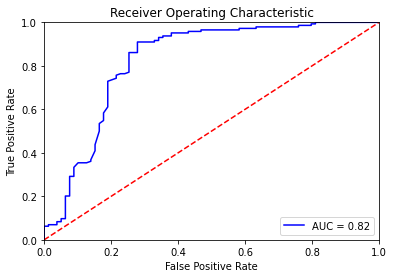

In [108]:
fpr,tpr, thres =  metrics.roc_curve(y_test==0, logreg.predict_proba(x_test)[:,0])
roc_auc = metrics.auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
ROC curve (receiver operating characteristic curve) :
is one of the most important evaluation metrics for checking any classification model’s 
performance. It’s plotted with two metrics against each other. TPR (True Positive Rate or Recall) 
and FPR (False Positive Rate) where the former is on y-axis and the latter is on x-axis.
TPR: is the recall which is, out of all positive cases, how many we predicted correctly.
FPR: out of all negatives cases how many we didn’t predict correctly.
    * The x-axis indicates the False Positive Rate and the y-axis indicates the True Positive Rate.
ROC computes TPR and FPR at various thresholds settings. Raising the classification threshold classifies 
more items as negative, therefore decreasing both false Positives and true Positives, and vice versa. 
This means the two metrics are correlated positively.
AUC tells how much our model, regardless of our chosen threshold, is able to distinguish between the two classes. 
The higher it is the better the model is. In a nutshell, AUC describes the degree of separability that our model makes. 
It has a value between 1 and 0.